# <center> FINAL PROJECT: STUDENT PERFORMANCE FACTORS <center> 

## A. INFORMATION

### I. Member Information


<center>

|No. | Name          | Student ID   | Email                    |
|:--:|:-------------:|:------------:|:------------------------:|
| 1  | Võ Hùng Khoa  | 22127202     | vhkhoa22@clc.fitus.edu.vn|
| 2  | Vũ Tuấn Hùng  | 22127137     | vthung22@clc.fitus.edu.vn|
| 3  | Huỳnh Tấn Đạt | 22127059     | htdat222@clc.fitus.edu.vn|

<center>

### II. Project Information 
#### 1. Project Introduction 
- In this project, students are required to select a public dataset, such as those available on *Kaggle*, related to a topic of interest to their group. The project involves exploring the dataset, which often includes preprocessing steps, and identifying meaningful questions that can be answered using the data. Students are then tasked with preprocessing and analyzing the data to address each question effectively, demonstrating their ability to draw insights and conclusions from the analysis.

#### 2. Topic
- The chosen topic: **Student Performance Factors** 

- Using a dataset that covers study habits, attendance, parental involvement, and other factors, the project aims to analyze how these aspects impact students' exam performance.


## B. Project Details

### I. Import Library and Read Dataset

#### 1. Import Library

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

#### 2. Read Dataset

In [57]:
data =  pd.read_csv("./StudentPerformanceFactors.csv")
data.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

### II. Data Preprocessing

#### 1. Hanlde Null and Duplicate Values

Looking at the big picture to identify what to do with the dataset!?

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

There are some null values in the dataset, so we are going to drop them all!

In [59]:
# Drop null-value
data.dropna(axis = 0 , inplace=True)
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Then, we are going to drop the duplicate values!

In [60]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

#### 2. Convert categorical data type to numeric data type

Looks clean! However, after completing the data preprocessing, we need to handle the object values and convert them to numeric values. Before that, we need to learn more about the dataset we are going to handle.

<!-- <center> -->

| Attribute                | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Hours_Studied            | Number of hours spent studying per week.                                    |
| Attendance               | Percentage of classes attended.                                             |
| Parental_Involvement     | Level of parental involvement in the student's education (Low, Medium, High).|
| Access_to_Resources      | Availability of educational resources (Low, Medium, High).                 |
| Extracurricular_Activities| Participation in extracurricular activities (Yes, No).                      |
| Sleep_Hours              | Average number of hours of sleep per night.                                 |
| Previous_Scores          | Scores from previous exams.                                                 |
| Motivation_Level         | Student's level of motivation (Low, Medium, High).                          |
| Internet_Access          | Availability of internet access (Yes, No).                                  |
| Tutoring_Sessions        | Number of tutoring sessions attended per month.                             |
| Family_Income            | Family income level (Low, Medium, High).                                   |
| Teacher_Quality          | Quality of the teachers (Low, Medium, High).                               |
| School_Type              | Type of school attended (Public, Private).                                  |
| Peer_Influence           | Influence of peers on academic performance (Positive, Neutral, Negative).   |
| Physical_Activity        | Average number of hours of physical activity per week.                      |
| Learning_Disabilities    | Presence of learning disabilities (Yes, No).                               |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate).   |
| Distance_from_Home       | Distance from home to school (Near, Moderate, Far).                         |
| Gender                   | Gender of the student (Male, Female).                                       |
| Exam_Score               | Final exam score.                                                           |

<!-- <center> -->

In [61]:
# Handle each categorical columns

ordinal_mapping = {"Low": 0, "Medium": 1, "High": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(ordinal_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(ordinal_mapping)

education_mapping = {"High School": 0, "College": 1, "Postgraduate": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(education_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(education_mapping)

distance_mapping = {"Near": 0, "Moderate": 1, "Far": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(distance_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(distance_mapping)

sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(sentiment_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(sentiment_mapping)

# Handle remaining categorical columns
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

In [62]:
data.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    2   
1             19          64                     0                    1   
2             24          98                     1                    1   
3             29          89                     0                    1   
4             19          92                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 0   
1                           0            8               59                 0   
2                           1            7               91                 1   
3                           1            8               98                 1   
4                           1            6               65                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                0                  0              0                1   
1                0                  2              1                1   
2                0                  2              1                1   
3                0                  1              1                1   
4                0                  3              1                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            0               2                  3                      0   
1            0               0                  4                      0   
2            0               1                  4                      0   
3            0               0                  4                      0   
4            0               1                  4                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         0                   0       0          67  
1                         1                   1       1          61  
2                         2                   0       0          74  
3                         0                   1       0          71  
4                         1                   0       1          70

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

Apply some logical to the dataset

In [64]:
data = data[(data["Exam_Score"] <= 100) & (data["Exam_Score"] >= 0)]
data = data[(data["Previous_Scores"] <= 100) & (data["Previous_Scores"] >= 0)]

In [65]:
data.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6377.000000  6377.000000           6377.000000          6377.000000   
mean       19.976008    80.018034              1.085620             1.098165   
std         5.985283    11.549434              0.694942             0.698689   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000              1.000000             1.000000   
50%        20.000000    80.000000              1.000000             1.000000   
75%        24.000000    90.000000              2.000000             2.000000   
max        44.000000   100.000000              2.000000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6377.000000  6377.000000      6377.000000   
mean                     0.596832     7.035126        75.063353   
std                      0.490572     1.468091        14.399766   
min                      0.000000     4.000000        50.000000   
25%                      0.000000     6.000000        63.000000   
50%                      1.000000     7.000000        75.000000   
75%                      1.000000     8.000000        88.000000   
max                      1.000000    10.000000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6377.000000      6377.000000        6377.000000    6377.000000   
mean           0.908107         0.075898           1.494747       0.787831   
std            0.695720         0.264855           1.233300       0.743430   
min            0.000000         0.000000           0.000000       0.000000   
25%            0.000000         0.000000           1.000000       0.000000   
50%            1.000000         0.000000           1.000000       1.000000   
75%            1.000000         0.000000           2.000000       1.000000   
max            2.000000         1.000000           8.000000       2.000000   

       Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
count      6377.000000  6377.000000     6377.000000        6377.000000   
mean          1.197115     0.304846        1.191626           2.972714   
std           0.601027     0.460378        0.756386           1.029006   
min           0.000000     0.000000        0.000000           0.000000   
25%           1.000000     0.000000        1.000000           2.000000   
50%           1.000000     0.000000        1.000000           3.000000   
75%           2.000000     1.000000        2.000000           4.000000   
max           2.000000     1.000000        2.000000           6.000000   

       Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
count            6377.000000               6377.000000         6377.000000   
mean                0.104751                  0.705504            0.503685   
std                 0.306257                  0.780581            0.670465   
min                 0.000000                  0.000000            0.000000   
25%                 0.000000                  0.000000            0.000000   
50%                 0.000000                  1.000000            0.000000   
75%                 0.000000                  1.000000            1.000000   
max                 1.000000                  2.000000            2.000000   

            Gender   Exam_Score  
count  6377.000000  6377.000000  
mean      0.421672    67.246825  
std       0.493865     3.891637  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   100.000000

All columns are in well format so now we can move on the next step!!! 

### III. Exploratory Data Analysis - EDA

#### 1. Overall

In [66]:
profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Comment: 

#### 2. Additional Visualizations

**Understanding the Distribution of Numerical Features**

To gain insights into the dataset, we analyze the distribution of key numerical features using histograms with kernel density estimates (KDE). This helps us:

1. Identify the overall shape of each distribution (e.g., normal, skewed, bimodal).
2. Detect potential anomalies or outliers in the data.
3. Compare the variability across different features.

**Key numerical features include:**

- **Hours_Studied**: Total hours dedicated to studying.
- **Attendance**: Attendance percentage.
- **Sleep_Hours**: Average sleep duration.
- **Previous_Scores**: Past performance scores.
- **Exam_Score**: Final exam score (target variable).

The following visualization will create one plot for each feature to reveal these patterns.

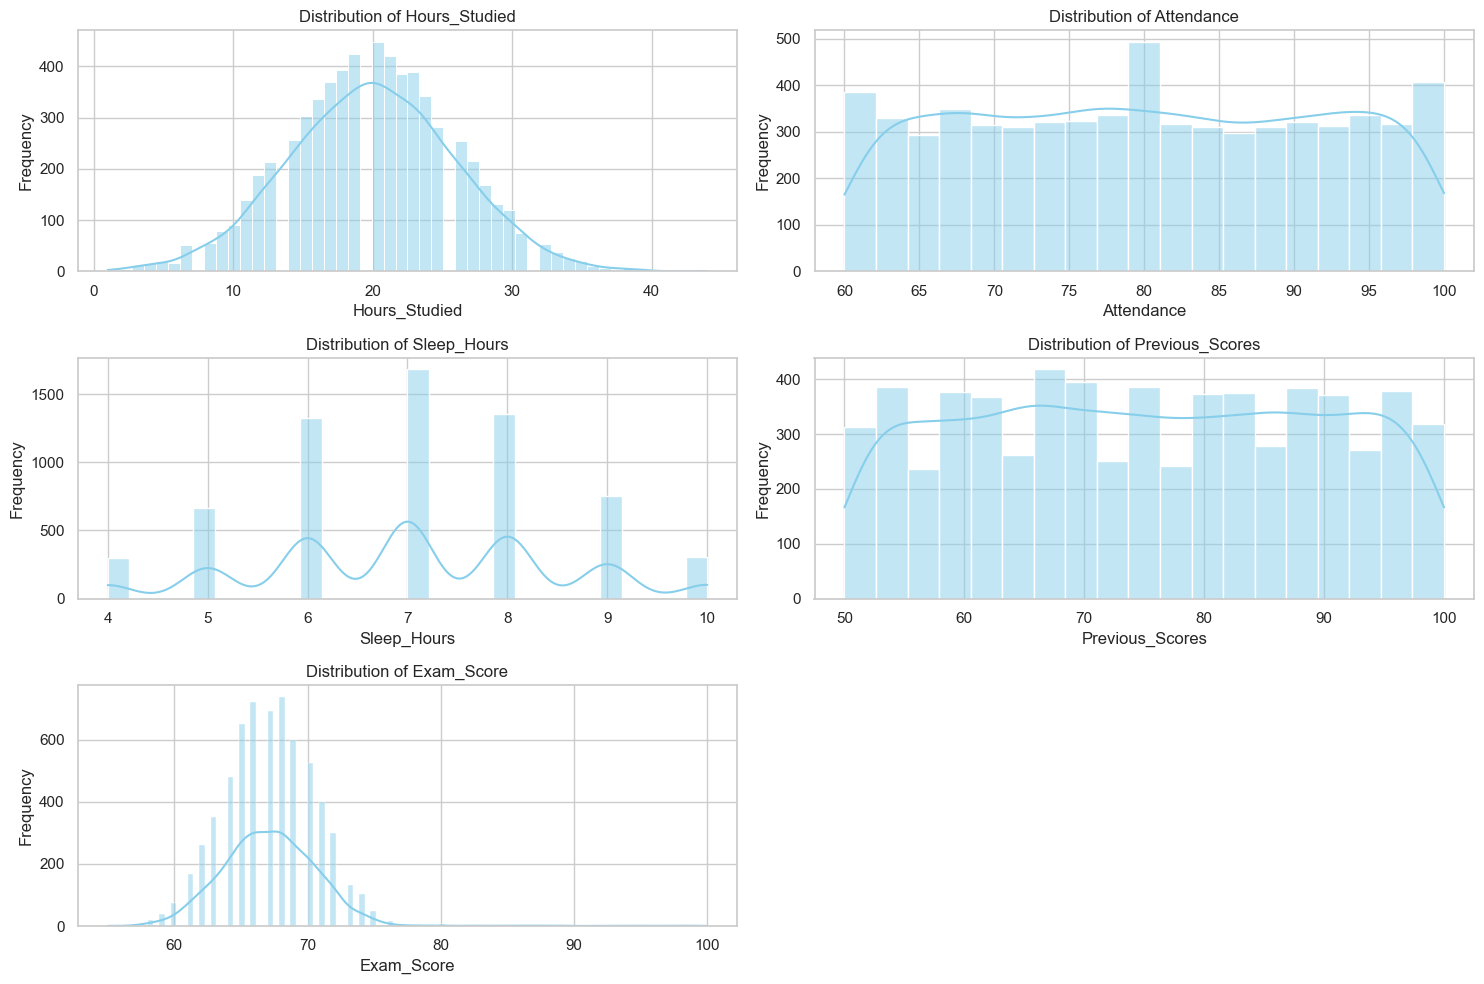

In [67]:
# Set plot aesthetics
sns.set_theme(style="whitegrid")

# Numerical features to visualize
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']

# Create subplots for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    sns.histplot(data=data, x=feature, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Frequency")

# Turn off the last empty subplot if the number of features is odd
if len(numerical_features) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

**Correlation Analysis of Numerical Features**

Understanding relationships between numerical features is crucial for data analysis. A **correlation heatmap** visualizes these relationships, where:

- **Values close to +1** indicate strong positive correlation (e.g., as one feature increases, so does the other).
- **Values close to -1** indicate strong negative correlation (e.g., as one feature increases, the other decreases).
- **Values near 0** suggest no significant relationship.
  
This helps us identify which features might influence the target variable (`Exam_Score`) or are highly related to one another.

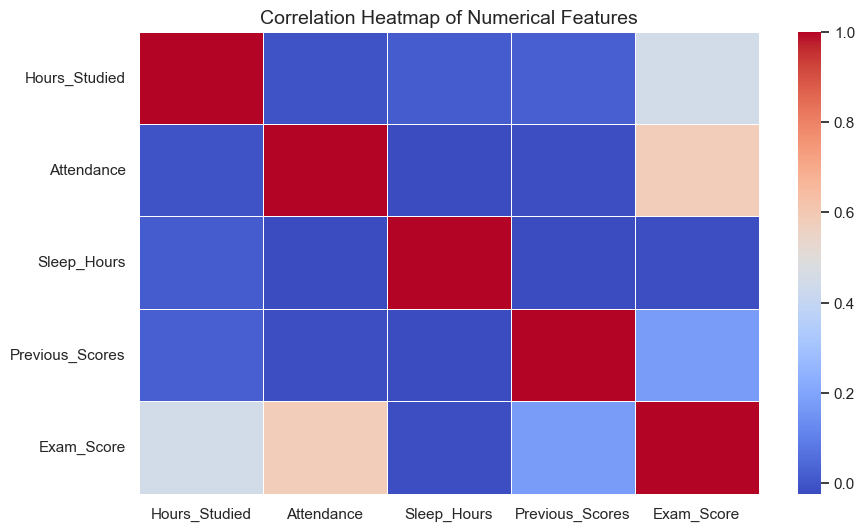

In [68]:
# Compute the correlation matrix for numerical features
correlation_matrix = data[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and labels
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

**Box Plot of Exam Scores by Categorical Features**

A box plot is useful for understanding the distribution and variability of a numerical variable across different categories. Here, we analyze how `Exam_Score` varies based on:

- **Gender**: Are there differences in performance between male and female students?
- **Extracurricular_Activities**: Do students who participate in extracurricular activities perform better?

In [69]:
data.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    2   
1             19          64                     0                    1   
2             24          98                     1                    1   
3             29          89                     0                    1   
4             19          92                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 0   
1                           0            8               59                 0   
2                           1            7               91                 1   
3                           1            8               98                 1   
4                           1            6               65                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                0                  0              0                1   
1                0                  2              1                1   
2                0                  2              1                1   
3                0                  1              1                1   
4                0                  3              1                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            0               2                  3                      0   
1            0               0                  4                      0   
2            0               1                  4                      0   
3            0               0                  4                      0   
4            0               1                  4                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         0                   0       0          67  
1                         1                   1       1          61  
2                         2                   0       0          74  
3                         0                   1       0          71  
4                         1                   0       1          70

C:\Users\kyhoa\AppData\Local\Temp\ipykernel_27320\1356029084.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Exam_Score', palette='pastel')
C:\Users\kyhoa\AppData\Local\Temp\ipykernel_27320\1356029084.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score', palette='pastel')


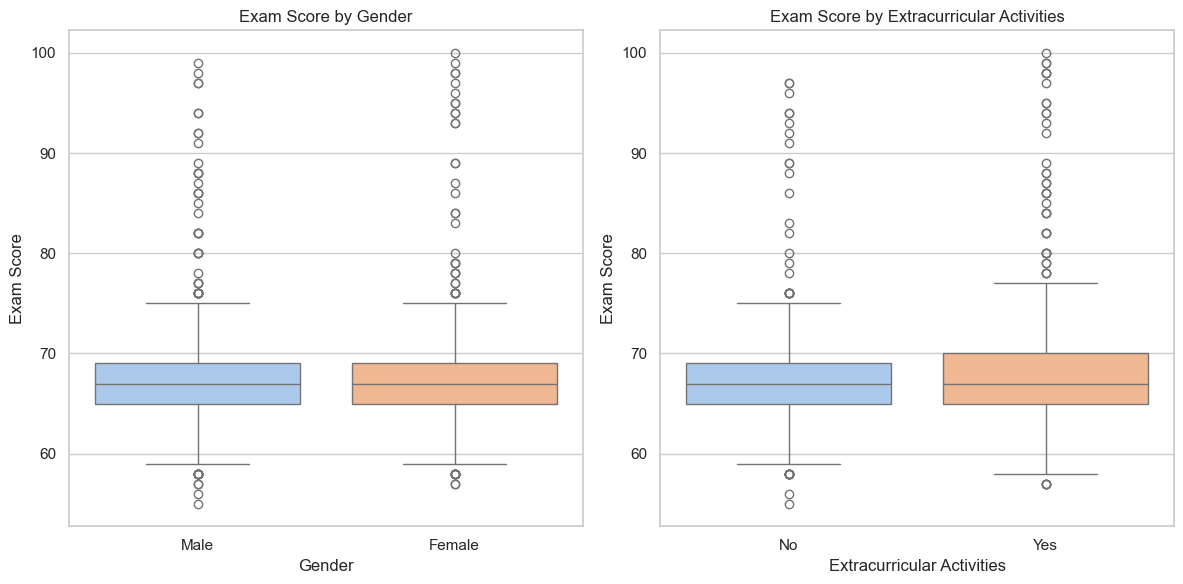

In [70]:
# Map numerical values to text labels for Gender and Extracurricular_Activities
df = data
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({0: 'No', 1: 'Yes'})

# Create box plots for Exam_Score by categorical features with updated labels
plt.figure(figsize=(12, 6))

# Gender vs Exam_Score
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='Exam_Score', palette='pastel')
plt.title('Exam Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Exam Score')

# Extracurricular Activities vs Exam_Score
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score', palette='pastel')
plt.title('Exam Score by Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show();

**Scatter Plot of Exam Scores vs Numerical Features**

Scatter plots reveal trends and relationships between two continuous variables. We'll examine how `Exam_Score` relates to:

- **Hours_Studied**: Does more studying lead to higher scores?
- **Previous_Scores**: Do past performance scores predict final exam results?

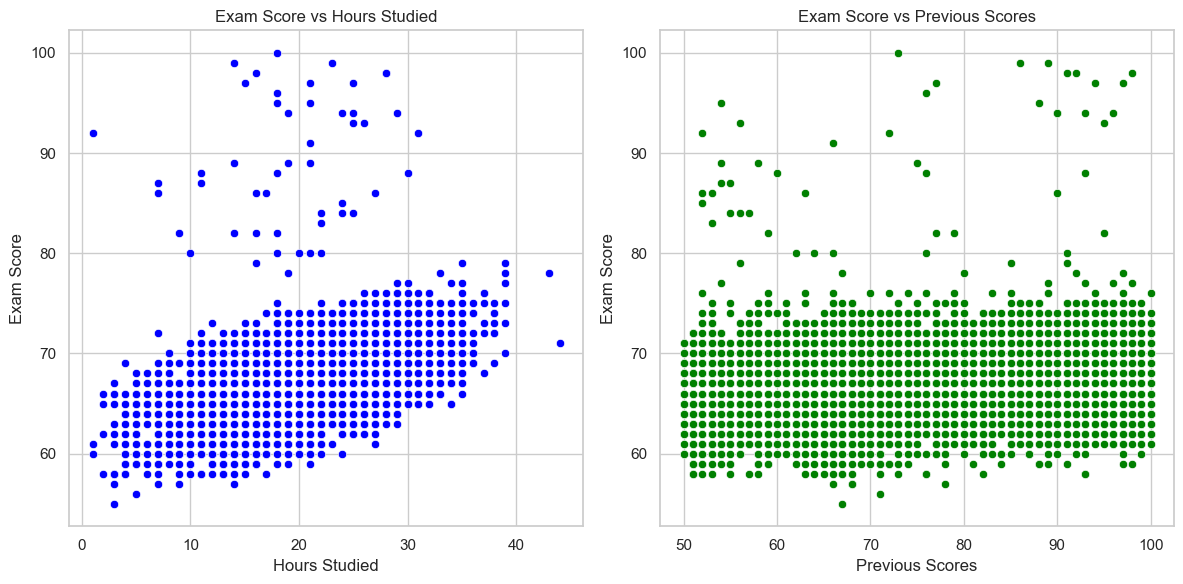

In [71]:
# Create scatter plots for Exam_Score vs other numerical features
plt.figure(figsize=(12, 6))

# Exam_Score vs Hours_Studied
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', color='blue')
plt.title('Exam Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

# Exam_Score vs Previous_Scores
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Previous_Scores', y='Exam_Score', color='green')
plt.title('Exam Score vs Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()


### VI. Ask Meaningful Question

### **Question 1: Which factors (e.g., Hours_Studied, Motivation_Level) have the strongest correlation with Exam_Score?**

#### **Why Answer This Question?**
- **Identifying Key Influences**: This question helps determine which factors have the strongest impact on exam performance, guiding targeted interventions to improve student outcomes.
- **Resource Prioritization**: Understanding these relationships is practical for prioritizing resources and focusing efforts on the most impactful variables.

#### **What Will Be Gained?**
- A ranked list of factors based on their correlation with **Exam_Score**.
- Insights into relationships between key features like **Hours_Studied**, **Motivation_Level**, and **Exam_Score**.

#### **Steps to Answer:**
1. **Correlation Analysis**:
   - Calculate correlation coefficients (e.g., Pearson, Spearman) between independent variables and **Exam_Score**.

2. **Feature Importance**:
   - Use regression models or feature importance techniques (e.g., Random Forest, Gradient Boosting) to determine key predictors.

3. **Visualization**:
   - Create visual representations (e.g., heatmaps, bar charts) to clearly compare the impact of each factor.


#### **Answer question**

Before we dive deeper into identifying which factors influence Exam_Score the most, we start by understanding the relationships between all variables and our target variable. To achieve this, we calculate the correlation coefficients using two methods: Pearson and Spearman. Pearson correlation helps us uncover linear relationships, while Spearman correlation is particularly useful for non-linear relationships.


However, our dataset contains categorical variables (e.g., Gender, School_Type) that need to be converted into numerical format before we calculate correlations. To do this, we use Label Encoding, which assigns a numeric value to each category. Once the data is prepared, we compute both Pearson and Spearman correlations for all features in the dataset. Finally, we visualize the results using bar plots, which allow us to quickly identify which factors are most strongly correlated with exam performance.

In [72]:
# Make a copy of the dataset to avoid modifying the original data
data_encoded = data.copy()

# Encode categorical variables
categorical_columns = data_encoded.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

# Calculate Pearson and Spearman correlations
correlation_pearson = data_encoded.corr(method='pearson')['Exam_Score'].sort_values(ascending=False)
correlation_spearman = data_encoded.corr(method='spearman')['Exam_Score'].sort_values(ascending=False)

# Display the top factors by correlation
print("Top Pearson Correlations with Exam_Score:")
print(correlation_pearson)

print("\nTop Spearman Correlations with Exam_Score:")
print(correlation_spearman)


Top Pearson Correlations with Exam_Score:
Exam_Score                    1.000000
Attendance                    0.581664
Hours_Studied                 0.446174
Previous_Scores               0.173635
Access_to_Resources           0.169035
Parental_Involvement          0.159087
Tutoring_Sessions             0.153986
Parental_Education_Level      0.107108
Peer_Influence                0.098271
Family_Income                 0.092913
Motivation_Level              0.090809
Teacher_Quality               0.073742
Extracurricular_Activities    0.062319
Physical_Activity             0.025260
School_Type                   0.011833
Gender                       -0.003369
Sleep_Hours                  -0.016314
Internet_Access              -0.056219
Learning_Disabilities        -0.083941
Distance_from_Home           -0.089611
Name: Exam_Score, dtype: float64

Top Spearman Correlations with Exam_Score:
Exam_Score                    1.000000
Attendance                    0.673974
Hours_Studied          

With the correlations calculated, we can now visualize the results to better interpret the strength of these relationships.

**Visualize Pearson correlations**

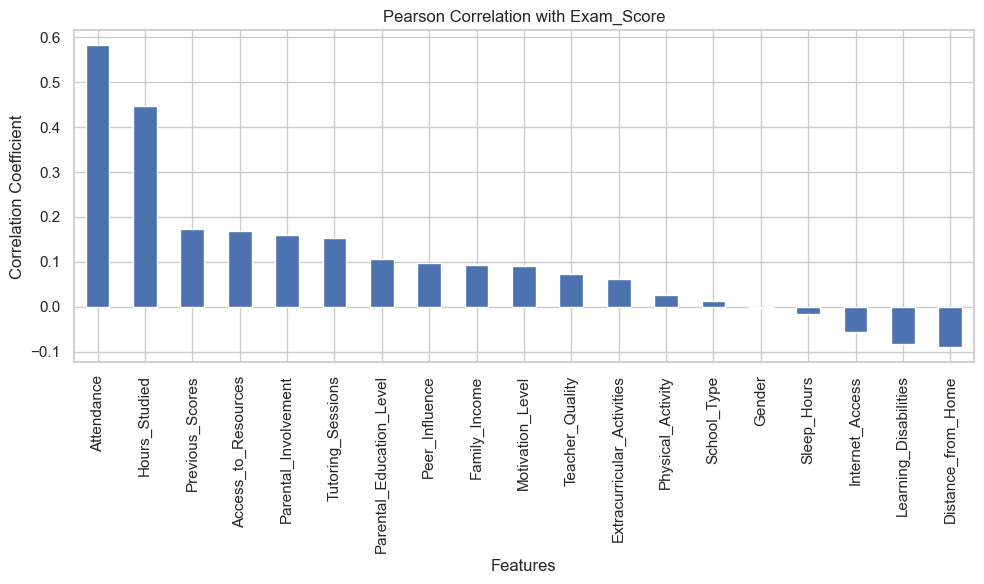

In [79]:
plt.figure(figsize=(10, 6))
correlation_pearson.drop('Exam_Score').plot(kind='bar')
plt.title('Pearson Correlation with Exam_Score')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Top Predictors:**

- Attendance and Hours_Studied are the strongest predictors of Exam_Score, with correlation coefficients of approximately 0.6 and 0.5, respectively. This indicates a strong positive linear relationship, where higher attendance and study hours lead to better scores.

- Previous_Scores also shows a moderate positive correlation (~0.3), suggesting that past academic performance is a reasonable indicator of future success.

**Supportive Features:**

- Access to Resources and Parental Involvement have weaker positive correlations (~0.2), indicating that while these factors support learning, they are not as impactful as attendance or study habits.

- Features like Motivation_Level and Tutoring_Sessions show even weaker correlations, highlighting their limited direct impact.

**Negative or Insignificant Predictors:** Factors such as Learning Disabilities, Internet Access, and Distance from Home show weak or negative correlations. These features either have minimal influence or might negatively affect performance in specific cases.

**Visualize Spearman correlations**

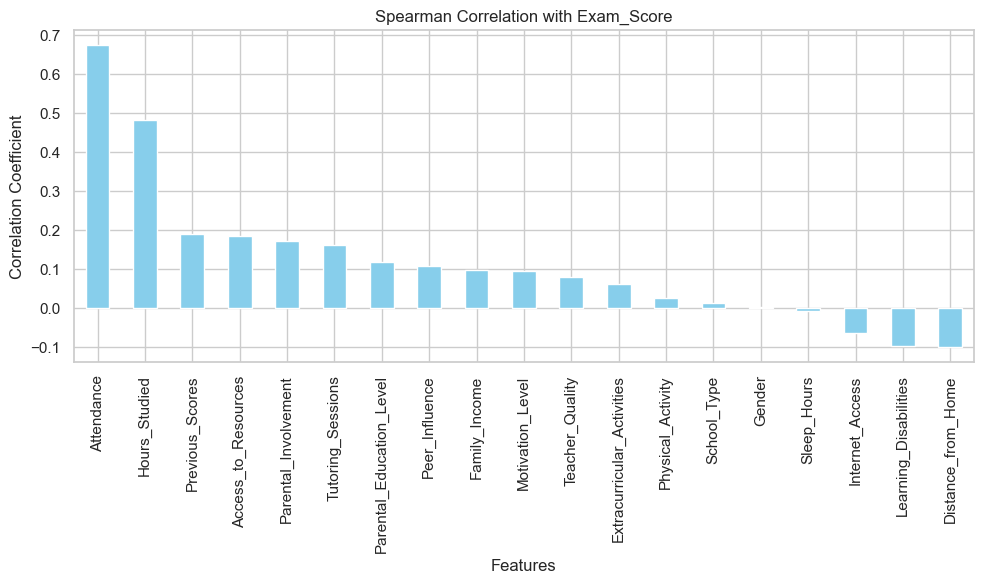

In [84]:
plt.figure(figsize=(10, 6))
correlation_spearman.drop('Exam_Score').plot(kind='bar', color='skyblue')
plt.title('Spearman Correlation with Exam_Score')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Consistency with Pearson:**

- The Attendance and Hours_Studied features remain the strongest predictors, with slightly higher correlation coefficients (up to 0.7). This indicates that their relationship with Exam_Score holds even for non-linear trends.

- Previous_Scores is again a strong contributor, reflecting consistency across both methods.

**Enhanced Perspective:**

- Access to Resources and Parental Involvement maintain their moderate rankings, but Spearman correlation slightly amplifies the importance of features with non-linear impacts, such as 
Motivation_Level and Parental Education Level.

- This suggests that some features, while weakly correlated linearly, may still have meaningful non-linear relationships with performance.

**Weak Predictors:** Similar to Pearson, features like Distance from Home, Learning Disabilities, and Internet Access remain weak predictors, confirming their limited role in influencing exam performance.

**Visualizing the Relationship Between Important Factors and Exam_Score**

To better understand how the most critical factors—Attendance, Hours_Studied, and Previous_Scores—influence academic performance, we visualize these relationships using scatter plots and box plots

Attendance vs. Exam_Score: We create a scatter plot to examine the trend between Attendance and Exam_Score. This helps illustrate whether higher attendance correlates with improved exam performance.

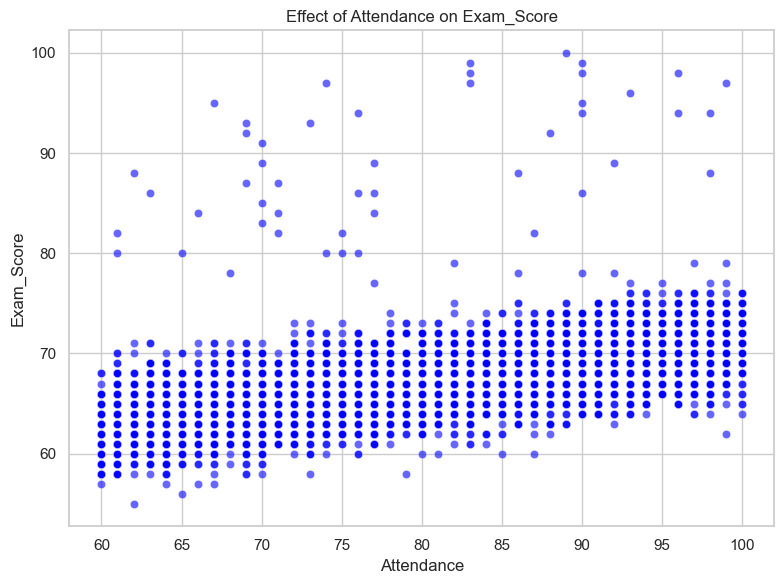

In [85]:
# Scatter Plot: Attendance vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Attendance', y='Exam_Score', color='blue', alpha=0.6)
plt.title('Effect of Attendance on Exam_Score')
plt.xlabel('Attendance')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

Hours_Studied vs. Exam_Score: A scatter plot is also used to visualize the impact of study hours on exam scores. This will highlight if increasing the number of study hours contributes to better performance.

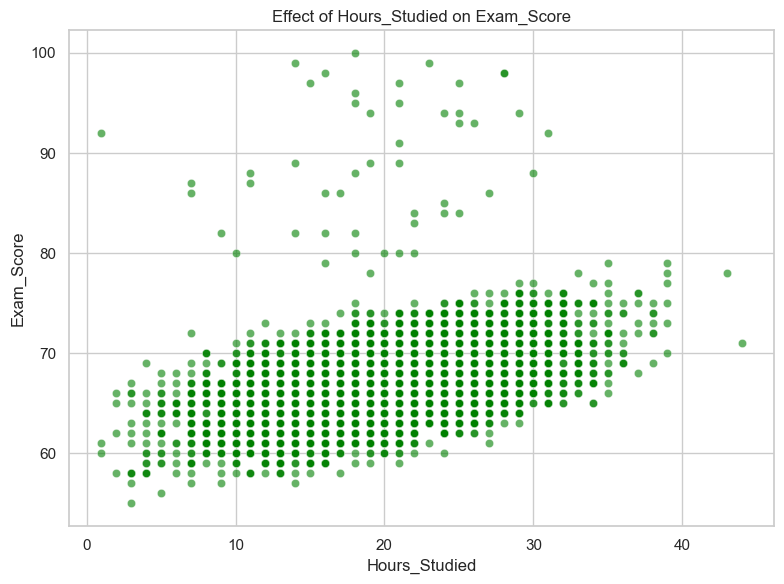

In [86]:
# Scatter Plot: Hours_Studied vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score', color='green', alpha=0.6)
plt.title('Effect of Hours_Studied on Exam_Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()


Previous_Scores vs. Exam_Score: To explore the effect of previous academic performance, we use a box plot. By dividing Previous_Scores into quartiles, we can observe how different ranges of past scores relate to Exam_Score distributions.

C:\Users\kyhoa\AppData\Local\Temp\ipykernel_27320\1678850767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=pd.qcut(data['Previous_Scores'], q=4), y='Exam_Score', palette='coolwarm')


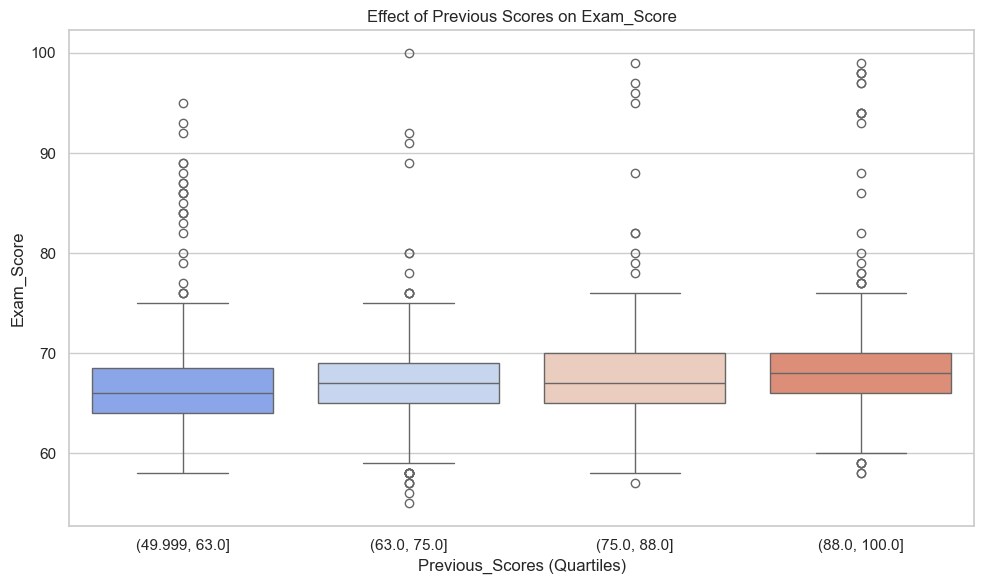

In [95]:
# Box Plot: Previous_Scores vs Exam_Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=pd.qcut(data['Previous_Scores'], q=4), y='Exam_Score', palette='coolwarm')
plt.title('Effect of Previous Scores on Exam_Score')
plt.xlabel('Previous_Scores (Quartiles)')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

These visualizations provide a clear picture of how these factors interact with exam performance and further validate their importance. Below is the Python code to generate the plots

#### Conclusion

From the analysis and visualizations, it is evident that Attendance, Hours_Studied, and Previous_Scores are the most significant factors influencing academic success. These factors consistently show strong positive relationships with Exam_Score, underscoring their importance in achieving high performance.

**Practical Implications**

- For Students: Regular attendance and disciplined study hours should be prioritized as they have the most significant impact on exam performance. Additionally, leveraging past performance insights can help identify areas for improvement.

- For Educators: Efforts should focus on encouraging attendance, fostering productive study environments, and providing targeted support to students with lower previous scores to enhance their outcomes.

- For Policymakers: Ensuring equitable access to resources and creating structured interventions for underperforming students can further support academic success.

In summary, while academic success is influenced by a combination of factors, consistent attendance, effective study habits, and leveraging prior performance are the strongest predictors. These insights serve as actionable guidance for students, educators, and institutions aiming to improve academic outcomes.

#### **Question 2: What is the minimum number of study hours required to achieve a high Exam_Score (e.g., above 80)?**

#### **Why Answer This Question?**
- This question helps determine the threshold of study hours necessary to achieve high performance, optimizing study time while ensuring success.
- It is particularly useful for students and educators in planning efficient study schedules.

#### **What Will Be Gained?**
- A specific value or range of **Hours_Studied** required to achieve a high score.
- A deeper understanding of the relationship between study time and performance.

#### **Steps to Answer:**
1. **Group Data**:
   - Categorize data into groups based on score thresholds (e.g., above and below 80).

2. **Analyze Relationship**:
   - Use scatter plots to visualize the relationship between **Hours_Studied** and **Exam_Score**.
   - Apply linear regression to determine the pattern.

3. **Identify Threshold**:
   - Use quantile analysis or logistic regression to pinpoint the minimum required study hours.


In [41]:
#code here

#### **Question 3: Do students with higher attendance perform better than those with lower attendance, even if they study fewer hours?**

#### **Why This Question is Important?**
- **Practical Insight**: This question explores the relative importance of attendance compared to study hours, helping educators and students prioritize strategies for improving performance.
- **Behavioral Focus**: It emphasizes the impact of consistency (attendance) versus effort (study hours), providing insights into effective academic habits.
- **Equity Consideration**: Understanding this relationship can inform interventions for students who may have limited study time but maintain regular attendance.

#### **What Can Be Gained?**
- **Comparison of Groups**: A clear understanding of whether high attendance can compensate for lower study hours in terms of performance.
- **Actionable Advice**: Guidance for students on whether prioritizing consistent class participation can offset lower independent study efforts.
- **Policy Implications**: Insights for educators or institutions to stress the importance of attendance in improving academic outcomes.

#### **Steps to Answer This Question**
1. **Define Groups**:
   - Segment students into groups based on their attendance levels (e.g., high and low attendance) and study hours (e.g., high and low study hours).
   - Create four groups:
     - High Attendance, High Study Hours
     - High Attendance, Low Study Hours
     - Low Attendance, High Study Hours
     - Low Attendance, Low Study Hours

2. **Compare Exam Scores**:
   - Calculate the average **Exam_Score** for each group to identify patterns and differences.

3. **Statistical Analysis**:
   - Perform ANOVA or a two-way interaction analysis to determine whether attendance has a significant effect on exam scores, controlling for study hours.

4. **Visualization**:
   - Use bar plots or grouped box plots to visually represent the relationship between attendance, study hours, and exam scores.

5. **Interpret Findings**:
   - Summarize the results and identify whether high attendance compensates for low study hours or if study hours dominate performance outcomes.


#### Answer the question

In this analysis, we used a Bar Plot to compare the average Exam_Score across different groups defined by combinations of Attendance and Hours_Studied. This visualization allowed us to identify which group performed the best and which required improvement. We chose the bar plot because it is an effective way to represent mean comparisons between distinct categories, providing a clear and straightforward overview of performance trends.

In [42]:
#code here

To further explore the data, we utilized a Box Plot to examine the distribution of Exam_Scores within each group. Unlike the bar plot, which focuses solely on averages, the box plot enabled us to investigate key details such as medians, quartiles, variability, and outliers. This gave us deeper insights into the consistency of scores within each group and helped us identify any large variations or irregularities in performance.

Finally, we employed a Heatmap to visualize the correlation matrix between variables like Attendance, Hours_Studied, and Exam_Score. This visualization allowed us to identify the strength of relationships between these variables in a clear and concise manner. By focusing on correlation coefficients, we could pinpoint which factors had the most significant impact on Exam_Score.


Overall, by using these three types of visualizations—bar plot, box plot, and heatmap—we were able to gain a comprehensive understanding of how attendance and study hours influence academic performance. The bar plot highlighted overall trends, the box plot provided deeper insights into variability, and the heatmap revealed key relationships between variables, guiding our analysis and conclusions.

In [43]:
# Code here

Comment: 

#### Question 4: 

In [44]:
# Code here

Comment